In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import ast
import math

In [2]:
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

In [3]:
# web app
# form to input and come up with output 
# save model as asset in proj folder and load

In [4]:
# forecasting
# stage of start up in next funding round will company even have funding round? - yes or no 
# linear regression amt of funding predited to get company into next round e.g. preseed etc

In [5]:
# NEWW
# modularise codes into py files

# EDA + Data Wrangling

In [60]:
df_old = pd.read_csv('1000.csv')

In [61]:
df_old.head()

,Unnamed: 0,CrunchBase Ranking,Profile Type,Organisation Name,Acquired by,About,Location,Number of Employees,Industry,IPO Status,...,Monthly Visits Growth,Number of Articles,Number of Events,Number of Funds,Funds Raised (for VC),Number of Investments,Number of Diversity Investments,Number of Exits,Stock Symbol,Date Pulled
0,0,1,INVESTMENT FIRM,softbank,NaN,"['SoftBank provides fixed-line, mobile telepho...","Tokyo, Tokyo, Japan",10001+,"['Banking', 'Finance', 'Internet', 'Mobile', '...",NaN,...,-73.81%,"['8,082']",['7'],3.0,$5.2B,251,24.0,54.0,['TYO:9984'],15/3/2021
1,1,2,ORGANIZATION,compassinc,NaN,['Compass is a real estate technology company ...,"New York, New York, United States",10001+,"['Property Management', 'Real Estate', 'Reside...",Private,...,9.55%,['224'],['3'],NaN,NaN,NaN,NaN,NaN,NaN,15/3/2021
2,2,3,ORGANIZATION,zoom-video-communications,NaN,['Zoom is a software company that offers a com...,"San Jose, California, United States",1001-5000,"['Collaboration', 'Information Technology', 'M...",Public,...,8.52%,"['2,918']",['42'],NaN,NaN,3,NaN,NaN,NaN,15/3/2021
3,3,4,INVESTMENT FIRM,crowdcube,NaN,['Crowdcube is an equity crowdfunding platform...,"Exeter, Devon, United Kingdom",51-100,"['Business Development', 'Finance', 'Financial...",NaN,...,-9.12%,"['1,281']",['5'],1.0,£5M,"1,209",16.0,29.0,NaN,15/3/2021
4,4,5,ORGANIZATION,flutterwave,NaN,['Flutterwave is a fintech company that provid...,"San Francisco, California, United States",251-500,"['Financial Services', 'FinTech', 'Payments']",Private,...,7.77%,['47'],['1'],NaN,NaN,NaN,NaN,NaN,NaN,15/3/2021


In [111]:
df = pd.read_csv('download_data_information.csv')

In [112]:
df

,name,profile_type,about,location,employee,hiring_status,investor,investor_type,website,industries,...,valuation_at_ipo,money_raised_at_ipo,last_funding,ipo_share_price,downloads_last_30_days,acquired_by,announced_date,price,diversity_spotlight_(us_only),sub-organization_of
0,itochu-corporation,INVESTMENT FIRM,['ITOCHU is a general trading company based in...,"Tokyo, Tokyo, Japan",1001-5000,NaN,Venture Capital,['Venture Capital'],www.itochu.co.jp,"['Banking', 'Finance', 'Trading Platform']",...,NaN,NaN,NaN,NaN,689,['Ecosystem Japan'],"['Jan 23, 2013']",NaN,NaN,NaN
1,90-seconds,ORGANIZATION,"[""90 Seconds is the world's video creation pla...","Singapore, Central Region, Singapore",101-250,NaN,NaN,NaN,90seconds.com,"['Brand Marketing', 'Content Creators', 'Inter...",...,NaN,NaN,Series B,NaN,3,NaN,NaN,NaN,NaN,NaN
2,compliancequest,ORGANIZATION,['ComplianceQuest is a cloud-based Enterprise ...,"Tampa, Florida, United States",101-250,NaN,NaN,NaN,www.compliancequest.com,"['Compliance', 'Software']",...,NaN,NaN,Series A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,modern-networks,ORGANIZATION,"['It provides IT and telecoms as a service.', ...","Hitchin, Hertford, United Kingdom",101-250,NaN,NaN,NaN,modern-networks.co.uk/,['Information Technology'],...,NaN,NaN,Private Equity,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,advanced-microgrid-solutions,ORGANIZATION,['Advanced Microgrid Solutions installs advanc...,"San Francisco, California, United States",51-100,NaN,NaN,NaN,advmicrogrid.com/,"['Clean Energy', 'Energy', 'Energy Storage', '...",...,NaN,NaN,Venture - Series Unknown,NaN,NaN,['Fluence'],"['Oct 15, 2020']",NaN,['Women Founded'],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,iteos-therapeutics,ORGANIZATION,['ITeos Therapeutics is a biotechnology compan...,"Cambridge, Massachusetts, United States",11-50,Actively Hiring - View All Jobs,NaN,NaN,iteostherapeutics.com/,"['Biotechnology', 'Health Care', 'Medical']",...,$635.2M,$201.1M,Series B,$19.00,NaN,NaN,NaN,NaN,NaN,NaN
538,buy2sell,ORGANIZATION,['Buy2sell is a supply chain and distribution ...,"Ho Chi Minh City, NA - Vietnam, Vietnam",101-250,NaN,NaN,NaN,buy2sell.vn/,"['Consulting', 'E-Commerce', 'Marketplace']",...,NaN,NaN,Series A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,instacarrro-com,ORGANIZATION,['InstaCarro is a car buying and selling servi...,"São Paulo, Sao Paulo, Brazil",101-250,NaN,NaN,NaN,www.instacarro.com/,"['Automotive', 'Direct Sales', 'E-Commerce']",...,NaN,NaN,Series A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540,voices-909a,ORGANIZATION,['Creator monetization platform'],"Los Angeles, California, United States",1-10,NaN,NaN,NaN,voic.es,NaN,...,NaN,NaN,Seed,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df.columns

Index(['name', 'profile_type', 'about', 'location', 'employee',
       'hiring_status', 'investor', 'investor_type', 'website', 'industries',
       'founded_date', 'closed_date', 'founders', 'operating_status',
       'last_funding_type', 'stock_symbol', 'headquarters_regions',
       'related_hubs', 'company_type', 'ipo_status', 'hub_tags',
       'product_downloads', 'investment_stage', 'number_of_funding_rounds',
       'number_of_lead_investors', 'number_of_investors', 'funds_raised',
       'number_of_funds', 'total_funding_amount', 'ipo_date',
       'total_fund_raised', 'number_of_investments',
       'number_of_lead_investments', 'number_of_diversity_investments',
       'number_of_acquisitions', 'number_of_exits',
       'number_of_board_member_and_advisor_profiles',
       'number_of_employee_profiles', 'total_products_active',
       'monthly_visits', 'monthly_visits_growth', 'active_tech_count',
       'number_of_articles', 'number_of_events', 'valuation_at_ipo',
       'm

In [123]:
# dropping not useful cols using contextual info - dont drop here drop at feat selec step
df.drop(['name', 'profile_type', 'about', 'hiring_status', 'website', 'founded_date', 'closed_date', 
         'stock_symbol', 'headquarters_regions', 'ipo_date', 'ipo_share_price', 
         'acquired_by', 'announced_date'], axis=1, inplace=True)

In [60]:
def nan_eda(df):
    total_null = df.isna().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_null, percent], axis=1, keys=['Total NaNs', 'Percent of NaNs'])
    return missing_data

In [61]:
# drop those with high percentage of NaNs
nan_eda(df)

,Total NaNs,Percent of NaNs
product_downloads,542,1.000000
funds_raised,542,1.000000
sub-organization_of,537,0.990775
investor,537,0.990775
number_of_funds,536,0.988930
total_fund_raised,536,0.988930
investment_stage,535,0.987085
related_hubs,535,0.987085
number_of_diversity_investments,531,0.979705
investor_type,531,0.979705


## Formatting columns

In [62]:
df.columns

Index(['location', 'employee', 'investor', 'investor_type', 'industries',
       'founders', 'operating_status', 'last_funding_type', 'related_hubs',
       'company_type', 'ipo_status', 'hub_tags', 'product_downloads',
       'investment_stage', 'number_of_funding_rounds',
       'number_of_lead_investors', 'number_of_investors', 'funds_raised',
       'number_of_funds', 'total_funding_amount', 'total_fund_raised',
       'number_of_investments', 'number_of_lead_investments',
       'number_of_diversity_investments', 'number_of_acquisitions',
       'number_of_exits', 'number_of_board_member_and_advisor_profiles',
       'number_of_employee_profiles', 'total_products_active',
       'monthly_visits', 'monthly_visits_growth', 'active_tech_count',
       'number_of_articles', 'number_of_events', 'valuation_at_ipo',
       'money_raised_at_ipo', 'last_funding', 'downloads_last_30_days',
       'price', 'diversity_spotlight_(us_only)', 'sub-organization_of'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   location                                     542 non-null    object 
 1   employee                                     541 non-null    object 
 2   investor                                     5 non-null      object 
 3   investor_type                                11 non-null     object 
 4   industries                                   539 non-null    object 
 5   founders                                     494 non-null    object 
 6   operating_status                             542 non-null    object 
 7   last_funding_type                            532 non-null    object 
 8   related_hubs                                 7 non-null      object 
 9   company_type                                 528 non-null    object 
 10  ip

In [114]:
def unlist_cat_cols_kmeans(df, listed_cat_cols_kmeans):
    for i in listed_cat_cols_kmeans:
        df[i] = df[i].apply(lambda x: ast.literal_eval(x) if x is not np.nan else np.nan)
        df[i] = df[i].apply(lambda x: " ".join(a for a in x) if x is not np.nan else np.nan)

In [115]:
unlist_cat_cols_kmeans(df, ['industries', 'related_hubs'])

In [116]:
def unlist_cat_cols(df, listed_cat_cols):
    for i in listed_cat_cols:
        df[i] = df[i].apply(lambda x: ", ".join(ast.literal_eval(x)) if x is not np.nan else np.nan)

In [117]:
#price?
unlist_cat_cols(df, ['operating_status', 'hub_tags', 'last_funding_type', 'company_type', 
                     'investor_type', 'diversity_spotlight_(us_only)', 'sub-organization_of'])

In [118]:
# TBC
currencies = {'£':1.42, '€':1.22, '₹':0.014, 'CN¥':0.16, 'ZAR':0.071, 'CA$':0.83, 'BDT':0.012, 
              'SEK':0.12, 'CHF':1.11, 'A$':0.77}

def currency_to_usd(df, list_of_other_currency_cols):
    for i in list_of_other_currency_cols:
        for j in range(len(df)):
            if df[i][j] is not np.nan:
                if df[i][j][0] == '$': # if its usd remove $ sign
                    df[i][j] =  df[i][j][1:]
                    
                elif df[i][j][1].isdigit():
                    value = str(float(df[i][j][1:-1])*currencies.get(df[i][j][0]))
                    df[i][j] = value+df[i][j][-1]
                    
                elif df[i][j][2].isdigit():
                    value = str(float(df[i][j][2:-1])*currencies.get(df[i][j][0:2]))
                    df[i][j] = value+df[i][j][-1]
                
                elif df[i][j][3].isdigit():
                    value = str(float(df[i][j][3:-1])*currencies.get(df[i][j][0:3]))
                    df[i][j] = value+df[i][j][-1]
                    

In [84]:
#TBC
currency_to_usd(df, ['total_funding_amount', 'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo'])

In [ ]:
# # code to check diff types of currencies in data
# currencies = {'£':1.42, '€':1.22, '₹':0.014, 'CN¥':0.16, 'ZAR':0.071, 'CA$':0.83, 'BDT':0.012, 
#               'SEK':0.12, 'CHF':1.11, 'A$':0.77}
# others = []
# for i in list_of_other_currency_cols:
#     for j in range(len(df)):
#         if df[i][j] is not np.nan:
#             if df[i][j][0] not in currencies.keys():
#                 others.append(df[i][j][0])
#             elif df[i][j][0:2] not in currencies.keys():
#                 others.append(df[i][j][0])
#             elif df[i][j][0:3] not in currencies.keys():
#                 others.append(df[i][j][0])

In [119]:
# assuming all values are in billion, million or NAN
def remove_BMK(df, list_of_BMK_cols):
    for i in list_of_BMK_cols:
        for j in range(len(df)):
            if df[i][j] is not np.nan:
                if df[i][j][-1] == 'B':
                    df[i][j] =  float(df[i][j][:-1])*1000000000
                elif df[i][j][-1] == 'M':
                    df[i][j] = float(df[i][j][:-1])*1000000
                elif df[i][j][-1] == 'K':
                    df[i][j] = float(df[i][j][:-1])*100000

In [72]:
remove_BMK(df, ['total_funding_amount', 'total_fund_raised', 'valuation_at_ipo', 'money_raised_at_ipo'])

In [120]:
def remove_commas_numeric(df, list_of_numeric_cols_w_comma):
    for i in list_of_numeric_cols_w_comma:
        df[i] = df[i].apply(lambda x: float(x.replace(',','')) if x is not np.nan else np.nan)

In [121]:
#product_downloads?
remove_commas_numeric(df, ['monthly_visits', 'downloads_last_30_days', 'number_of_articles'])

In [73]:
# def remove_commas_from_list_numeric(df, list_of_numeric_cols_w_comma_list):
#     for i in list_of_numeric_cols_w_comma_list:
#         df[i] = df[i].apply(lambda x: float(ast.literal_eval(x)[0].replace(',', '')) if x is not np.nan else np.nan)

In [74]:
# remove_commas_from_list_numeric(df, ['Number of Articles', 'Number of Events'])

In [113]:
df['monthly_visits_growth'] = df['monthly_visits_growth'].apply(lambda x: float(x.replace(',', '').replace('%', ''))*100 if x is not np.nan else np.nan)

In [124]:
df.head()

,location,employee,investor,investor_type,industries,founders,operating_status,last_funding_type,related_hubs,company_type,...,active_tech_count,number_of_articles,number_of_events,valuation_at_ipo,money_raised_at_ipo,last_funding,downloads_last_30_days,price,diversity_spotlight_(us_only),sub-organization_of
0,"Tokyo, Tokyo, Japan",1001-5000,Venture Capital,Venture Capital,Banking Finance Trading Platform,NaN,Active,NaN,ITOCHU Corporation Portfolio Companies,For Profit,...,38.0,82.0,1.0,NaN,NaN,NaN,689.0,NaN,NaN,NaN
1,"Singapore, Central Region, Singapore",101-250,NaN,NaN,Brand Marketing Content Creators Internet Video,"['Nick Erskine-Shaw, Tim Norton']",Active,Series B,NaN,For Profit,...,34.0,22.0,6.0,NaN,NaN,Series B,3.0,NaN,NaN,NaN
2,"Tampa, Florida, United States",101-250,NaN,NaN,Compliance Software,"['Atulya Risal, Govardhan Muralidhar, Govardha...",Active,Series A,NaN,For Profit,...,51.0,14.0,2.0,NaN,NaN,Series A,NaN,NaN,NaN,NaN
3,"Hitchin, Hertford, United Kingdom",101-250,NaN,NaN,Information Technology,NaN,Active,Private Equity,NaN,NaN,...,46.0,3.0,NaN,NaN,NaN,Private Equity,NaN,NaN,NaN,NaN
4,"San Francisco, California, United States",51-100,NaN,NaN,Clean Energy Energy Energy Storage Renewable E...,"['Jackalyne Pfannenstiel, Susan Kennedy']",Active,Venture - Series Unknown,NaN,For Profit,...,10.0,32.0,1.0,NaN,NaN,Venture - Series Unknown,NaN,NaN,Women Founded,NaN


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   location                                     542 non-null    object 
 1   employee                                     541 non-null    object 
 2   investor                                     5 non-null      object 
 3   investor_type                                11 non-null     object 
 4   industries                                   539 non-null    object 
 5   founders                                     494 non-null    object 
 6   operating_status                             542 non-null    object 
 7   last_funding_type                            532 non-null    object 
 8   related_hubs                                 7 non-null      object 
 9   company_type                                 528 non-null    object 
 10  ip

## Handling NaN

In [335]:
# drop all nan values or replace nan with median/mode
# since we have a lot of data just drop na and dont replace so as to not lose integrity of data

In [318]:
def handle_numeric_nan(df):
    numeric_cols = df.select_dtypes(include='float').columns  
    #replacing nan with median
    for i in numeric_cols:
        df[i].replace('nan', np.nan)
        df[i].replace(np.nan, df[i].median(), inplace=True)

In [319]:
handle_numeric_nan(df)

In [29]:
# def handle_cat_nan(df):
#     cat_cols = df.select_dtypes(include='object').columns  
#     #replacing nan with mode
#     for i in cat_cols:
#         df[i].replace('nan', np.nan)
#         df[i].replace('None', np.nan)
#         df[i].replace(np.nan, df[i].mode(), inplace=True)
        
# #ValueError: Series.replace cannot use dict-value and non-None to_replace

In [30]:
# handle_cat_nan(df)

In [342]:
# # this does scaling of all variables - dont do here?
# def handle_numeric_outliers(df):
#     numeric_cols = df.select_dtypes(include='float').columns
#     #log transforming values instead of dropping or replacing outliers to preserve original dataset and not drop rows
#     for i in numeric_cols:
#         df[i] = df[i].map(lambda x: np.log(x) if x > 0 else 0)

In [253]:
# handle_numeric_outliers(df)

In [51]:
cat_cols = df.select_dtypes(include='object')
cat_cols.drop(['Total Funding Amount', 'Funds Raised (for VC)'], axis=1, inplace=True)
for i in cat_cols:
    print(df[i].value_counts(), '\n')

San Francisco, California, United States    167
New York, New York, United States           113
London, England, United Kingdom              42
Boston, Massachusetts, United States         21
Palo Alto, California, United States         18
                                           ... 
Vienna, Virginia, United States               1
San Antonio, Texas, United States             1
Kraków, Malopolskie, Poland                   1
Pittsburgh, Pennsylvania, United States       1
Vilnius, Vilniaus Apskritis, Lithuania        1
Name: Location, Length: 250, dtype: int64 

101-250       203
251-500       164
1001-5000     152
Nov-50        128
501-1000      118
10001+         87
51-100         82
5001-10000     35
1-Oct          26
Name: Number of Employees, dtype: int64 

Financial Services FinTech Payments                                                                    4
Banking Financial Services FinTech                                                                     4
Banking Financ

## Feature Engineering

In [ ]:
# Unicorn + Pledge 1% Unicorn [value >= $1B]
# Exited Unicorn + Exited Unicorn, Pledge 1% + Crunchbase Venture Program, Exited Unicorn [value >= $1B, public or acq]
# Emerging Unicorn + Emerging Unicorn, Pledge 1% [$1B >= value >= $500M]

# others: Crunchbase Venture Program + Crunchbase Venture Program, Pledge 1% + Pledge 1%

In [127]:
def hub_tag_cat(hub_tag):
    tags = {'Unicorn':['Unicorn', 'Pledge 1%, Unicorn'], 
            'Exited Unicorn': ['Exited Unicorn', 'Exited Unicorn, Pledge 1%', 'Crunchbase Venture Program, Exited Unicorn'], 
            'Emerging Unicorn': ['Emerging Unicorn', 'Emerging Unicorn, Pledge 1%'], 
            'Others': ['Crunchbase Venture Program', 'Crunchbase Venture Program, Pledge 1%', 'Pledge 1%']}
    
    if hub_tag is not np.nan:
        for k, v in tags.items():
            if hub_tag in v:
                return k
        return k
    else:
        return np.nan

In [128]:
df['hub_tags_cat'] = df['hub_tags'].apply(lambda x: hub_tag_cat(x))

In [129]:
df['location_country'] = df['location'].apply(lambda x: str(x).split(",")[-1].lstrip())

In [130]:
df['location_city'] = df['location'].apply(lambda x: str(x).split(",")[0].lstrip())

In [131]:
df['location_city'].unique()

array(['Tokyo', 'Singapore', 'Tampa', 'Hitchin', 'San Francisco',
       'London', 'Grand Cayman', 'Brisbane', 'Lisboa', 'Docklands',
       'Paso Robles', 'San Diego', 'Washington', 'Boston', 'Madrid',
       'Tel Aviv', 'New York', 'Cranberry', 'Gurgaon', 'Kansas City',
       'Seoul', 'Seattle', 'Nashville', 'Depok', 'Basking Ridge', 'Miami',
       'Encinitas', 'Lincoln', 'Redwood City', 'Austin', 'Mumbai',
       'Montréal', 'Santa Clara', 'São Paulo', 'Offenburg', 'Palo Alto',
       'Loves Park', 'Mountain View', 'Des Moines', 'Carrickmines',
       'Stockholm', 'Malmö', 'Barcelona', 'La Jolla', 'Stevenage',
       'Seongnam', 'Cambridge', 'Los Angeles', 'Paris', 'Guilford',
       'Bengaluru', 'Irvine', 'Jerusalem', 'Mundelein', 'Pleasanton',
       'Chicago', 'Berlin', 'Brooklyn', 'Waltham', 'Amsterdam', 'Amman',
       'Copenhagen', 'Durham', 'Worthing', 'Toronto', 'Irving',
       'San Jose', 'Fresno', 'Calabasas', 'San Mateo', 'Anyang',
       'Kiryat Gat', 'Weston', 'Züric

In [132]:
# https://thenextweb.com/news/top-7-startup-cities-keep-their-ranking-in-2020-but-new-players-are-on-the-rise
def location_city_in_startup_cluster(df):
    # top 20 most prominent startup locations
    top_20_startup_locations = ['Silicon Valley', 'New York', 'London', 'Beijing', 'Boston',
                        'Tel Aviv', 'Los Angeles', 'Shanghai', 'Seattle', 'Stockholm',
                        'Washington DC', 'Amsterdam', 'Paris', 'Chicago', 'Tokyo',
                        'Berlin', 'Singapore', 'Toronto-Waterloo', 'Austin', 'Seoul']
    
    df['in_startup_cluster'] = df['location_city'].apply(lambda x: 1 if x in top_20_startup_locations else 0) 

In [133]:
location_city_in_startup_cluster(df)

In [66]:
# # replacing countries with 2019 GDP in USD million, TBC
# def location_country_to_gdp(df):
#     country_code = {'Japan': 5082465, 'United States':21433226, 'United Kingdom': 2826441, 'Sweden': 530883, 
#                     'China':14342933, 'Canada':1736426, 'Israel': 395098, 'India':2875142, 'Finland': 269296, 
#                     'Germany': 3861123}
    
#     df['Location Country 2019 GDP'] = df['Location Country']
#     df.replace({'Location Country 2019 GDP': country_code}, inplace=True) 

In [67]:
# location_country_to_gdp(df)

In [68]:
df.head()

,Location,Number of Employees,Industry,IPO Status,IPO Date,Founded Date,Operating Status,Hub Tags,Related Hubs,Last Funding Type,...,Number of Events,Number of Funds,Funds Raised (for VC),Number of Investments,Number of Diversity Investments,Number of Exits,Hub Tags Cat,Location Country,Location City,Location Country 2019 GDP
0,"Tokyo, Tokyo, Japan",10001+,Banking Finance Internet Mobile Telecommunicat...,NaN,1999-05-14,"['Sep 3, 1981']",Active,NaN,SoftBank Portfolio Companies,Post-IPO Equity,...,7.0,3.0,5200000000.0,251.0,24.0,54.0,NaN,Japan,Tokyo,5082465
1,"New York, New York, United States",10001+,Property Management Real Estate Residential,Private,NaT,"['Oct 4, 2012']",Active,Unicorn,NaN,Series G,...,3.0,NaN,NaN,NaN,NaN,NaN,Others,United States,New York,21433226
2,"San Jose, California, United States",1001-5000,Collaboration Information Technology Messaging...,Public,2019-04-18,['2011'],Active,Exited Unicorn,NaN,Post-IPO Equity,...,42.0,NaN,NaN,3.0,NaN,NaN,Others,United States,San Jose,21433226
3,"Exeter, Devon, United Kingdom",51-100,Business Development Finance Financial Service...,NaN,NaT,"['Aug 1, 2010']",Active,Crunchbase Venture Program,Crowdcube Portfolio Companies,Venture - Series Unknown,...,5.0,1.0,7100000.0,1209.0,16.0,29.0,Others,United Kingdom,Exeter,2826441
4,"San Francisco, California, United States",251-500,Financial Services FinTech Payments,Private,NaT,['2016'],Active,"Pledge 1%, Unicorn",NaN,Series C,...,1.0,NaN,NaN,NaN,NaN,NaN,Others,United States,San Francisco,21433226


In [134]:
ind = df[['industries']]

In [135]:
ind.dropna(inplace=True)

In [136]:
ind

,industries
0,Banking Finance Trading Platform
1,Brand Marketing Content Creators Internet Video
2,Compliance Software
3,Information Technology
4,Clean Energy Energy Energy Storage Renewable E...
...,...
536,Cannabis Fitness Health Care Wellness
537,Biotechnology Health Care Medical
538,Consulting E-Commerce Marketplace
539,Automotive Direct Sales E-Commerce


In [137]:
hubs = df[['related_hubs']]
hubs.dropna(inplace=True)

In [138]:
hubs

,related_hubs
0,ITOCHU Corporation Portfolio Companies
172,Publicis Sapient Alumni Founded Companies
231,Deerfield Management Portfolio Companies
311,IAC Alumni Founded Companies
312,Procter & Gamble Company Alumni Founded Companies
370,LivingSocial Alumni Founded Companies
442,Big Idea Ventures Portfolio Companies


In [139]:
class Kmeans: # run after removing NANs from industry col
    """ 
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        self.centroids = None
        self.cluster_labels = None
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        Returns
        -------
        instance of kmeans class
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for i in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if i % 100 == 0:
                print("Running Model Iteration %d " %i)
        print("Model finished running")
        return self

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer
#create tfidf array based on unique industries
def create_tfidf_array(data):
    
    tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                                 max_features = 20000)
    tf_idf = tf_idf_vectorizor.fit_transform(data)
    tf_idf_norm = normalize(tf_idf)
    tf_idf_array = tf_idf_norm.toarray()
    
    return tf_idf_array

In [141]:
from sklearn.cluster import KMeans
def dim_reduction(data):
    
    tf_idf_array = create_tfidf_array(data)
    sklearn_pca = PCA(n_components = 2)
    reduced_dim = sklearn_pca.fit_transform(tf_idf_array)
    
    return reduced_dim
#     kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
#     fitted = kmeans.fit(Y_sklearn)
#     prediction = kmeans.predict(Y_sklearn)

In [142]:
def elbow_plot(data, start, end):
    
    #tf_idf_array = create_tfidf_array(data)
    reduced_dim = dim_reduction(data)
    
    number_clusters = range(start, end)
    kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]

    score = [kmeans[i].fit(reduced_dim).score(reduced_dim) for i in range(len(kmeans))]

    plt.plot(number_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Method')
    plt.show()

#from plot ideal number of clusters appears to be 3

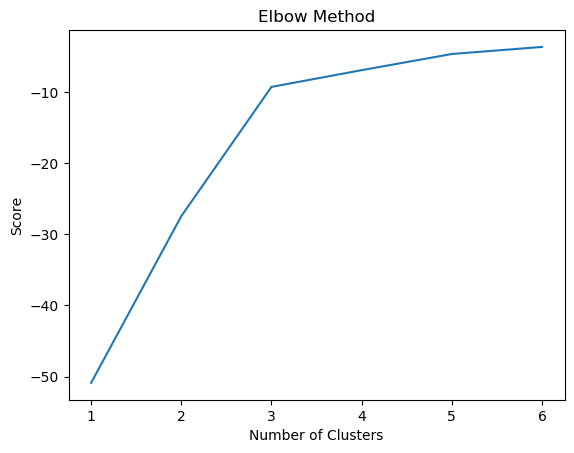

In [143]:
elbow_plot(ind['industries'], 1, 7)

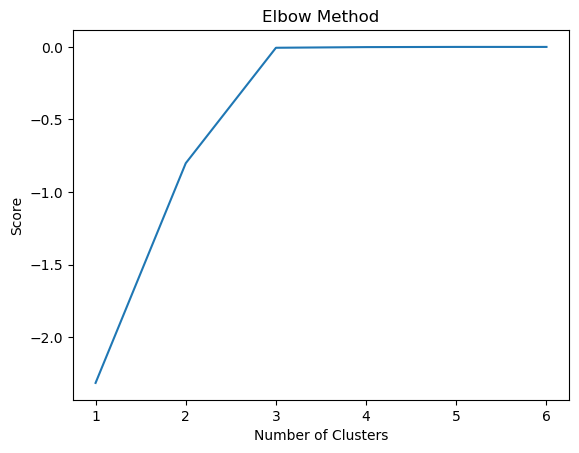

In [144]:
elbow_plot(hubs['related_hubs'], 1, 7)

In [145]:
from sklearn.metrics import pairwise_distances

def test_fit_and_predict(clusters, seed, iterations, data):
    #tfidf_array = create_tfidf_array(data)
    Y_sklearn = dim_reduction(data)
    
#     sklearn_pca = PCA(n_components = 2)
#     Y_sklearn = sklearn_pca.fit_transform(tfidf_array)

    kmeans_test = Kmeans(clusters, seed, iterations)
    fitted = kmeans_test.fit_kmeans(Y_sklearn)
    predicted_values = kmeans_test.predict(Y_sklearn)

    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

    centers = fitted.centroids
    plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6)
    
    return predicted_values

#     kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
#     fitted = kmeans.fit(Y_sklearn)
#     prediction = kmeans.predict(Y_sklearn)

In [146]:
predicted_values_industry = test_fit_and_predict(3, 1, 200, ind['industries'])

Running Model Iteration 0 
Running Model Iteration 100 
Model finished running


In [147]:
len(predicted_values_industry)

539

In [148]:
ind_pred = pd.concat([ind['industries'], pd.Series(predicted_values_industry, index=ind.index)], axis=1)

In [149]:
ind_pred

,industries,0
0,Banking Finance Trading Platform,2
1,Brand Marketing Content Creators Internet Video,0
2,Compliance Software,0
3,Information Technology,0
4,Clean Energy Energy Energy Storage Renewable E...,0
...,...,...
536,Cannabis Fitness Health Care Wellness,1
537,Biotechnology Health Care Medical,1
538,Consulting E-Commerce Marketplace,0
539,Automotive Direct Sales E-Commerce,0


In [150]:
predicted_values_hubs = test_fit_and_predict(2, 1, 200, hubs['related_hubs'])

Running Model Iteration 0 
Running Model Iteration 100 
Model finished running


In [151]:
len(predicted_values_hubs)

7

In [152]:
pd.concat([hubs['related_hubs'], pd.Series(predicted_values_hubs, index=hubs.index)], axis=1)

,related_hubs,0
0,ITOCHU Corporation Portfolio Companies,1
172,Publicis Sapient Alumni Founded Companies,1
231,Deerfield Management Portfolio Companies,1
311,IAC Alumni Founded Companies,1
312,Procter & Gamble Company Alumni Founded Companies,1
370,LivingSocial Alumni Founded Companies,1
442,Big Idea Ventures Portfolio Companies,0


In [153]:
pd.get_dummies(ind_pred[0], prefix='type')

,type_0,type_1,type_2
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
536,0,1,0
537,0,1,0
538,1,0,0
539,1,0,0


In [154]:
def hub_tags_to_ohe(df):
    ohe_types = pd.get_dummies(df['hub_tags_cat'], prefix='type')
    new_df = pd.concat([df.drop('hub_tags_cat', axis=1), ohe_types], axis=1)
    return new_df

In [156]:
df = hub_tags_to_ohe(df)

In [155]:
def fundtype_to_ohe(df):
    ohe_types = pd.get_dummies(df['last_funding_type'], prefix='type')
    new_df = pd.concat([df.drop('last_funding_type', axis=1), ohe_types], axis=1)
    return new_df

In [157]:
df = fundtype_to_ohe(df)

In [79]:
def ipo_to_ohe(df):
    ohe_types = pd.get_dummies(df['ipo_status'], prefix='type')
    new_df = pd.concat([df.drop('ipo_status', axis=1), ohe_types], axis=1)
    return new_df

In [ ]:
df = ipo_to_ohe(df)

In [160]:
# ohe last_funding
df['last_funding'].unique()

array([nan, 'Series B', 'Series A', 'Private Equity',
       'Venture - Series Unknown', 'Initial Coin Offering',
       'Post-IPO Debt', 'Secondary Market', 'Convertible Note', 'Seed',
       'Debt Financing', 'Series C', 'Undisclosed', 'Post-IPO Equity',
       'Series D', 'Corporate Round', 'Pre-Seed', 'Series E',
       'Non-equity Assistance', 'Grant', 'Equity Crowdfunding',
       'Series F', 'Product Crowdfunding'], dtype=object)

In [162]:
df["employee"].unique()

array(['1001-5000', '101-250', '51-100', '11-50', '251-500', '1-10',
       '10001+', '5001-10000', '501-1000', nan], dtype=object)

In [163]:
def employees_to_le(df):
    employees = {'1-10':1, '11-50': 2, '51-100':3, '101-250':4, '251-500':5, '501-1000':6, '1001-5000':7, 
             '5001-10000':8, '10001+':9}
    
    df['employee'] = df['employee'].apply(lambda x: x if x in employees.keys() else np.nan)
    df["employee_cat"] = df["employee"]
    df.replace({'employee_cat': employees}, inplace=True) 

In [164]:
employees_to_le(df)

In [165]:
def opstatus_to_le(df): # target variable
    df["operating_status_cat"] = df["operating_status"].astype('category').cat.codes

In [166]:
opstatus_to_le(df)

In [85]:
df.head()

,Location,Number of Employees,Industry,IPO Date,Founded Date,Operating Status,Hub Tags,Related Hubs,Company Type,Investor Type,...,type_Series H,type_Series I,type_Series J,type_Undisclosed,type_Venture - Series Unknown,type_Delisted,type_Private,type_Public,Number of Employees Cat,Operating Status Cat
0,"Tokyo, Tokyo, Japan",10001+,Banking Finance Internet Mobile Telecommunicat...,1999-05-14,"['Sep 3, 1981']",Active,NaN,SoftBank Portfolio Companies,For Profit,Investment Bank,...,0,0,0,0,0,0,0,0,7.0,0
1,"New York, New York, United States",10001+,Property Management Real Estate Residential,NaT,"['Oct 4, 2012']",Active,Unicorn,NaN,For Profit,NaN,...,0,0,0,0,0,0,1,0,7.0,0
2,"San Jose, California, United States",1001-5000,Collaboration Information Technology Messaging...,2019-04-18,['2011'],Active,Exited Unicorn,NaN,For Profit,NaN,...,0,0,0,0,0,0,0,1,5.0,0
3,"Exeter, Devon, United Kingdom",51-100,Business Development Finance Financial Service...,NaT,"['Aug 1, 2010']",Active,Crunchbase Venture Program,Crowdcube Portfolio Companies,For Profit,Venture Capital,...,0,0,0,0,1,0,0,0,1.0,0
4,"San Francisco, California, United States",251-500,Financial Services FinTech Payments,NaT,['2016'],Active,"Pledge 1%, Unicorn",NaN,For Profit,NaN,...,0,0,0,0,0,0,1,0,3.0,0


# Model

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# model imports
from sklearn.linear_model import NaiveBayes
# kNN
# RF
from sklearn.svm import LinearSVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Scaling data

## Fitting models

## Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
lr_acc = accuracy_score(y_test, y_pred_nb)

## SVM

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
svm_acc = accuracy_score(y_test, y_pred_svm)